## VGG16

### Loading the classes

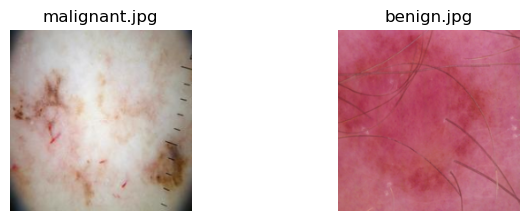

In [153]:
import os
import cv2
import matplotlib.pyplot as plt
import numpy as np
path='/Users/himanshugulechha/Desktop/MSc AI&ML/Sem3/DL/skin_cancer/inf'
image=[]
cancer=[]
for j in os.listdir(path):
    if j.split('.')[-1]=='jpg':
        img=cv2.imread(os.path.join(path,j))
        img=cv2.resize(img,(200,200))
        image.append(img)
        cancer.append(j)
plt.figure(figsize=(12,8))
c=1
for i in range(0,len(image)):
    plt.subplot(3,3,c)                                    
    plt.imshow(np.array(cv2.cvtColor(image[i],cv2.COLOR_BGR2RGB)))
    plt.title(cancer[i])
    plt.axis('off')
    c+=1

### Loading the Training dataset

In [154]:
path = '/Users/himanshugulechha/Desktop/MSc AI&ML/Sem3/DL/skin_cancer/train'
classes = {'benign': 0, 'malignant': 1}
X = []
Y = []
for cls in classes:
    pth = os.path.join(path, cls)
    for j in os.listdir(pth):
        if j.split('.')[-1]=='jpg':
            img = cv2.imread(os.path.join(pth, j))
            img = cv2.resize(img, (200, 200))
            X.append(img)
            Y.append(classes[cls])

### Loading the Testing datatset

In [155]:
path = '/Users/himanshugulechha/Desktop/MSc AI&ML/Sem3/DL/skin_cancer/test'
classes = {'benign': 0, 'malignant': 1}
X_test = []
Y_test = []
for cls in classes:
    pth = os.path.join(path, cls)
    for j in os.listdir(pth):
        if j.split('.')[-1]=='jpg':
            img = cv2.imread(os.path.join(pth, j))
            img = cv2.resize(img, (200, 200))
            X_test.append(img)
            Y_test.append(classes[cls])

### Processing Sets

In [156]:
X = np.array(X)
Y = np.array(Y)
X_test=np.array(X_test)
Y_test=np.array(Y_test)
X = X.reshape(X.shape[0], 200, 200, 3)
X_test = X_test.reshape(X_test.shape[0], 200, 200, 3)
X=X.astype('float32')
X_test=X_test.astype('float32')
X/=255
X_test/=255
from tensorflow.keras.utils import to_categorical
Y, Y_test = to_categorical(Y), to_categorical(Y_test)

### Splitting training dataset into training and validation

In [157]:
from sklearn.model_selection import train_test_split
X_train,X_val,Y_train,Y_val=train_test_split(X,Y,stratify=Y,test_size=0.2)

### Custom CNN Model

In [158]:
from keras.models import Sequential
from keras.layers import Dense, Dropout, Conv2D, MaxPool2D, Flatten
from keras.layers import BatchNormalization, RandomFlip,RandomRotation,RandomZoom, Input
model1 = Sequential([
    Input(shape=(200,200,3)),
    RandomFlip("horizontal"),
    RandomRotation(0.1),
    RandomZoom(0.1)])
# convolutional layer
model1.add(Conv2D(32, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model1.add(MaxPool2D(pool_size=(2,2)))
model1.add(BatchNormalization())
# convolutional layer
model1.add(Conv2D(64, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model1.add(MaxPool2D(pool_size=(2,2)))
model1.add(BatchNormalization())

model1.add(Conv2D(128, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model1.add(MaxPool2D(pool_size=(2,2)))
model1.add(BatchNormalization())

model1.add(Conv2D(256, kernel_size=(3,3), strides=(1,1), padding='same', activation='relu'))
model1.add(MaxPool2D(pool_size=(2,2)))
model1.add(BatchNormalization())
# flatten output of conv
model1.add(Flatten())

# hidden layer
model1.add(Dense(512, activation='relu'))
model1.add(Dropout(0.5))
model1.add(Dense(512, activation='relu'))
model1.add(Dropout(0.5))

# output layer
model1.add(Dense(2, activation='softmax'))

In [162]:
model1.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer='adam')

In [163]:
model1.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 random_flip_9 (RandomFlip)  (None, 200, 200, 3)       0         
                                                                 
 random_rotation_9 (RandomR  (None, 200, 200, 3)       0         
 otation)                                                        
                                                                 
 random_zoom_9 (RandomZoom)  (None, 200, 200, 3)       0         
                                                                 
 conv2d_35 (Conv2D)          (None, 200, 200, 32)      896       
                                                                 
 max_pooling2d_35 (MaxPooli  (None, 100, 100, 32)      0         
 ng2D)                                                           
                                                                 
 batch_normalization_35 (Ba  (None, 100, 100, 32)    

In [164]:
history1=model1.fit(X_train, Y_train, batch_size=32, epochs=10,validation_data=(X_val, Y_val))

Epoch 1/10
66/66 [==============================] - 36s 532ms/step - loss: 8.9404 - accuracy: 0.7070 - val_loss: 9.5356 - val_accuracy: 0.4545
Epoch 2/10
66/66 [==============================] - 35s 524ms/step - loss: 5.5325 - accuracy: 0.7046 - val_loss: 0.7017 - val_accuracy: 0.5644
Epoch 3/10
66/66 [==============================] - 35s 524ms/step - loss: 2.1352 - accuracy: 0.6994 - val_loss: 0.6795 - val_accuracy: 0.5436
Epoch 4/10
66/66 [==============================] - 34s 515ms/step - loss: 1.1546 - accuracy: 0.7226 - val_loss: 0.6758 - val_accuracy: 0.6723
Epoch 5/10
66/66 [==============================] - 34s 512ms/step - loss: 0.8953 - accuracy: 0.7084 - val_loss: 0.8498 - val_accuracy: 0.5795
Epoch 6/10
66/66 [==============================] - 34s 516ms/step - loss: 0.5931 - accuracy: 0.7150 - val_loss: 0.5766 - val_accuracy: 0.7519
Epoch 7/10
66/66 [==============================] - 34s 514ms/step - loss: 0.5516 - accuracy: 0.7454 - val_loss: 0.4620 - val_accuracy: 0.7670

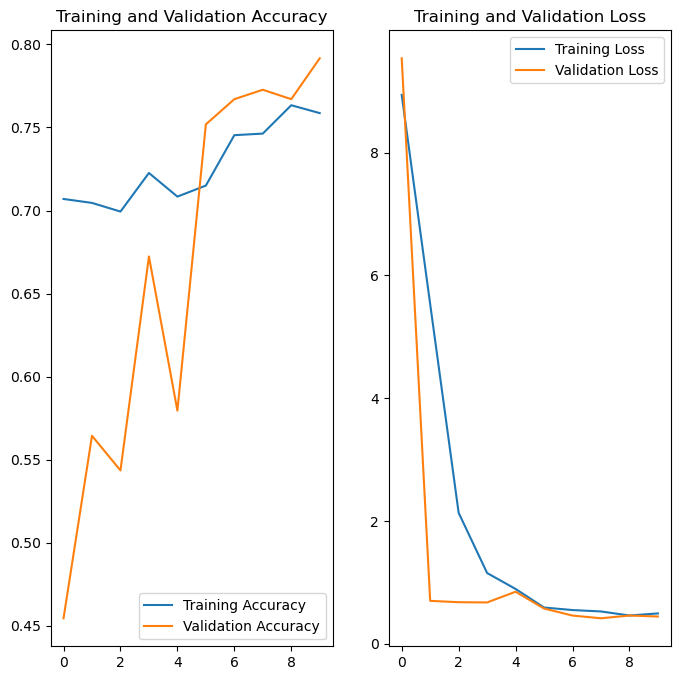

In [165]:
acc = history1.history['accuracy']
val_acc = history1.history['val_accuracy']

loss = history1.history['loss']
val_loss = history1.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### VGG16 model

In [166]:
from tensorflow.keras.applications import VGG16
model_vgg16 = VGG16(input_shape=(200,200,3), include_top=False, weights='imagenet')

In [167]:
for layer in model_vgg16.layers:
   layer.trainable=False
model_vgg16.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_14 (InputLayer)       [(None, 200, 200, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 200, 200, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 200, 200, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 100, 100, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 100, 100, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 100, 100, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 50, 50, 128)       0     

In [168]:
model = Sequential()
model.add(model_vgg16)
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))
model.summary()

Model: "sequential_13"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg16 (Functional)          (None, 6, 6, 512)         14714688  
                                                                 
 flatten_13 (Flatten)        (None, 18432)             0         
                                                                 
 dense_36 (Dense)            (None, 512)               9437696   
                                                                 
 dropout_22 (Dropout)        (None, 512)               0         
                                                                 
 dense_37 (Dense)            (None, 512)               262656    
                                                                 
 dropout_23 (Dropout)        (None, 512)               0         
                                                                 
 dense_38 (Dense)            (None, 2)               

In [170]:
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
history=model.fit(X_train, Y_train, batch_size=32, epochs=10,validation_data=(X_val, Y_val))

Epoch 1/10
66/66 [==============================] - 156s 2s/step - loss: 0.8945 - accuracy: 0.6885 - val_loss: 0.3546 - val_accuracy: 0.8561
Epoch 2/10
66/66 [==============================] - 155s 2s/step - loss: 0.4282 - accuracy: 0.8108 - val_loss: 0.3502 - val_accuracy: 0.8447
Epoch 3/10
66/66 [==============================] - 155s 2s/step - loss: 0.4158 - accuracy: 0.8042 - val_loss: 0.3467 - val_accuracy: 0.8466
Epoch 4/10
66/66 [==============================] - 155s 2s/step - loss: 0.3888 - accuracy: 0.8089 - val_loss: 0.4044 - val_accuracy: 0.8371
Epoch 5/10
66/66 [==============================] - 156s 2s/step - loss: 0.3986 - accuracy: 0.8013 - val_loss: 0.3610 - val_accuracy: 0.8409
Epoch 6/10
66/66 [==============================] - 156s 2s/step - loss: 0.3925 - accuracy: 0.7852 - val_loss: 0.3349 - val_accuracy: 0.8504
Epoch 7/10
66/66 [==============================] - 156s 2s/step - loss: 0.4095 - accuracy: 0.7790 - val_loss: 0.3268 - val_accuracy: 0.8333
Epoch 8/10
66

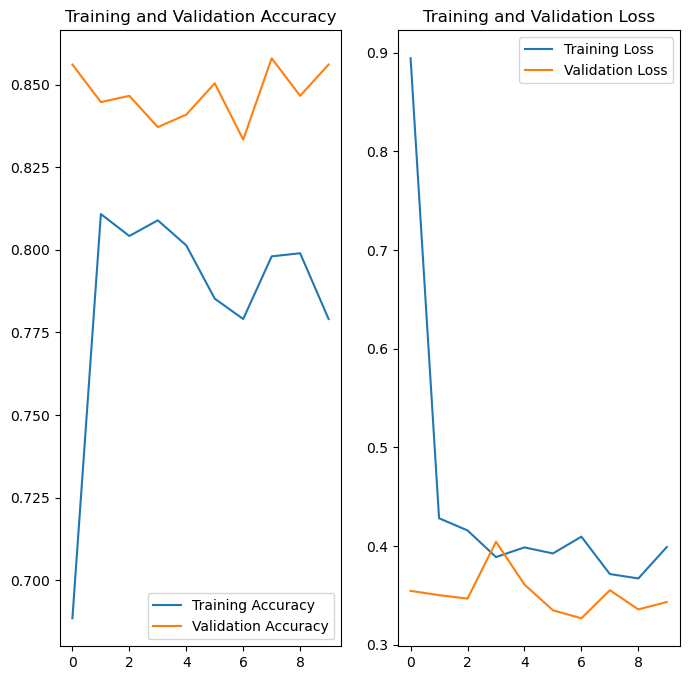

In [172]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(10)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

### Predictions

[1. 0.]
1/1 [==============================] - 0s 84ms/step
According to custom-CNN this image most likely belongs to Benign 
According to VGG16 this image most likely belongs to Benign 


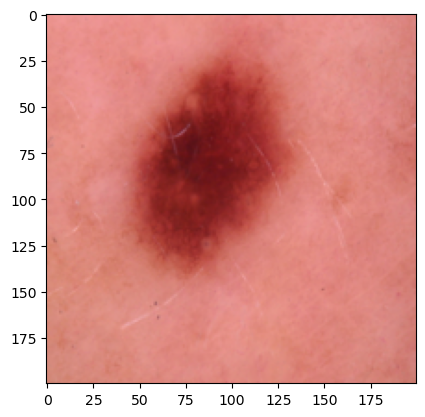

In [188]:
import tensorflow as tf
import random
class_names=['Benign','Malignant']
number=random.randint(0,X_test.shape[0])
img_array=np.expand_dims(X_test[number], axis=0)
print(Y_test[number])
predictions = model1.predict(img_array)
score = tf.nn.softmax(predictions[0])
predictions = model.predict(img_array)
score1 = tf.nn.softmax(predictions[0])
plt.imshow(np.array(cv2.cvtColor(X_test[number],cv2.COLOR_BGR2RGB)))
print(
    "According to custom-CNN this image most likely belongs to {} "
    .format(class_names[np.argmax(score)]))
print(
    "According to VGG16 this image most likely belongs to {} "
    .format(class_names[np.argmax(score1)]))

### Model Evaluation

In [186]:
y_pred = model1.predict(X_test)
y_pred1=model.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_pred_classes1=np.argmax(y_pred1, axis=1)
y_true = np.argmax(Y_test, axis=1)
from sklearn.metrics import confusion_matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
conf_matrix1 = confusion_matrix(y_true, y_pred_classes1)
print('Custom CNN:\n',conf_matrix)
print('VGG16:\n',conf_matrix1)

21/21 [==============================] - 39s 2s/step
Custom CNN:
 [[231 129]
 [ 14 286]]
VGG16:
 [[319  41]
 [ 58 242]]


In [189]:
from sklearn.metrics import classification_report
print('Custom CNN:\n',classification_report(y_true, y_pred_classes))
print('VGG16:\n',classification_report(y_true, y_pred_classes1))

Custom CNN:
               precision    recall  f1-score   support

           0       0.94      0.64      0.76       360
           1       0.69      0.95      0.80       300

    accuracy                           0.78       660
   macro avg       0.82      0.80      0.78       660
weighted avg       0.83      0.78      0.78       660

VGG16:
               precision    recall  f1-score   support

           0       0.85      0.89      0.87       360
           1       0.86      0.81      0.83       300

    accuracy                           0.85       660
   macro avg       0.85      0.85      0.85       660
weighted avg       0.85      0.85      0.85       660



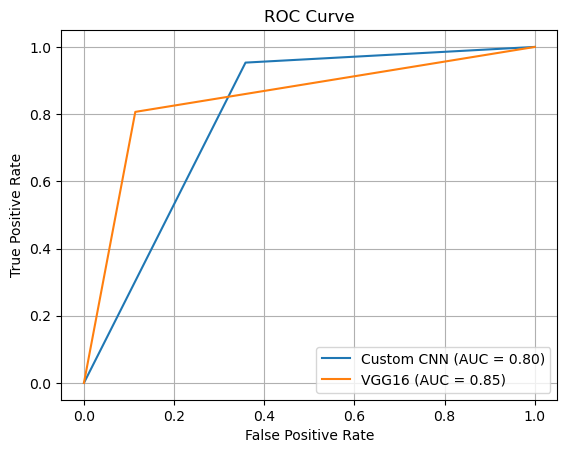

In [191]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr_model1, tpr_model1, _ = roc_curve(y_true, y_pred_classes)
roc_auc_model1 = roc_auc_score(y_true, y_pred_classes)
fpr_model2, tpr_model2, _ = roc_curve(y_true, y_pred_classes1)
roc_auc_model2 = roc_auc_score(y_true, y_pred_classes1)
plt.plot(fpr_model1, tpr_model1, label='Custom CNN (AUC = {:.2f})'.format(roc_auc_model1))
plt.plot(fpr_model2, tpr_model2, label='VGG16 (AUC = {:.2f})'.format(roc_auc_model2))
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()